### Imports

In [2]:
# Mettre ici tous les imports
import importlib
import pandas as pd
import modules.data_processing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Reloading, relancer cette cell si vous modifiez les fonctions

importlib.reload(modules.data_processing)
from modules.data_processing import *

In [5]:
DATA_PATH = './data/wiki-RfA.txt'

### Preparing Data

In [6]:
wiki_df = extract_data(DATA_PATH)
process_dataframe(wiki_df)

#elections_df = create_elections_df(wiki_df) -> IF NEEDED
#users_df = create_users_df(wiki_df) -> IF NEEDED

In [7]:
wiki_df.head(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1
5,Sven Manguard,BDD,1,1,2013,2013-04-20 01:53:00,'''Support''' There are plenty of important ro...,1
6,Ramaksoud2000,BDD,1,1,2013,2013-04-20 02:00:00,'''Support''' per noms. I don't see a reason n...,1
7,RockMagnetist,BDD,1,1,2013,2013-04-20 02:18:00,'''Support''' BDD already wields a broom pret...,1
8,Carrite,BDD,1,1,2013,2013-04-20 02:22:00,'''Support''' barring a completely unexpected ...,1
9,Someguy1221,BDD,1,1,2013,2013-04-20 03:09:00,'''Support''' because I see no good reason not...,1


* It is important to have an idea of the proportion of votes within our dataset.

Text(0.5, 0, 'VOT')

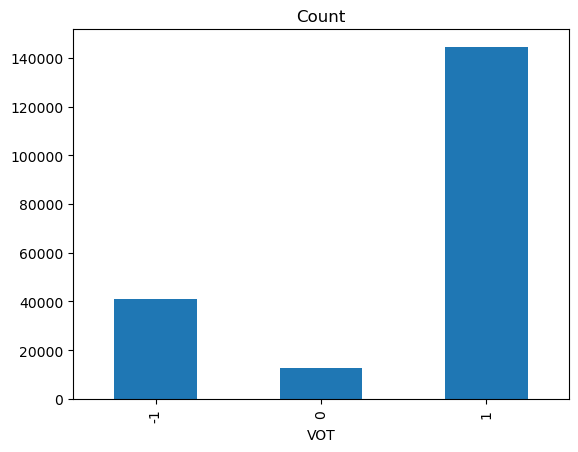

In [8]:
ax = wiki_df['VOT'].value_counts().sort_index().plot(kind='bar', title='Count')
ax.set_xlabel('VOT')

#### Text preprocessing

In [9]:
wiki_copy = wiki_df.copy()

In [132]:
#wiki_copy['TXT'].replace('', np.nan, inplace = True)
#wiki_copy['TXT'].isna().sum()

In [10]:
len(wiki_copy[wiki_copy['TXT'] == '']['TXT'])

7190

* We notice that we have 7190 missing values among comments. 

#### Removing the Wiki Markup from the comments

In [11]:
# ensure that TXT is string
wiki_copy['TXT'] = wiki_copy['TXT'].astype(str)

* We will try to use a python library called "wikitextparser" to easily remove the wiki markup. 

In [13]:
from wikitextparser import remove_markup, parse

In [14]:
example = wiki_copy.iloc[66609]['TXT']
example

"Congratulatory '''Support''' - Excellent [[Wikipedia:WikiProject Military history|WikiProject:Military history]] experience with this user. Can be trusted with new responsibility."

In [15]:
remove_markup(example)

'Congratulatory Support - Excellent WikiProject:Military history experience with this user. Can be trusted with new responsibility.'

* The library didn't handle the link removal as expected. Therefore, we will implement a classic function using regular expressions to remove the wiki markup, relying on the Wikitext structure from the website [Wikitext](https://en.wikipedia.org/wiki/Help:Wikitext).

In [23]:
from modules.data_processing import *
importlib.reload(modules.data_processing)

remove_wiki_markup(example)

'Congratulatory Support - Excellent  experience with this user. Can be trusted with new responsibility.'

* The results is indeed what we want. Let's test on a random sample of comments.

In [17]:
txts = wiki_copy['TXT'].sample(10).copy()
for i, comment in enumerate(txts): 
    print(i, ' : ' , comment)
    print() 

0  :  '''Strong Oppose''' per Rory096.

1  :  

2  :  '''Neutral''' You're a good editor, but the experience isn't wholy there. Try again in a few months and this will likely be different. I think the year suggestion is a bit extreme though as you could end up sitting around being fully qualified for a long time.

3  :  '''SUPPORT!''' Has GREATLY improved since his last RfA. Per Werdna and CrazyRussian, it is about fucking time.

4  :  '''Suppose'''. Thought he was one, think he should be one. &mdash;[[User:Nightstallion|<span style="font-variant:small-caps">Nightst</span>]]<font color="green">[[User:Nightstallion/esperanza|<span style="font-variant:small-caps">a</span>]]</font>

5  :  '''Weak Oppose''' other reasons, but mostly [http://en.wikipedia.org/w/index.php?title=Hasan-Jalalian&diff=169068218&oldid=169068090 this] - came across it on NPP..redirects aren't usually prime "new page crap" material, most of the time there's something going to be created there soon, especially with a

In [24]:
for i, comment in enumerate(txts): 
    print(i, ' : ' , remove_wiki_markup(comment))
    print() 

0  :  Strong Oppose per Rory096.

1  :  

2  :  Neutral You're a good editor, but the experience isn't wholy there. Try again in a few months and this will likely be different. I think the year suggestion is a bit extreme though as you could end up sitting around being fully qualified for a long time.

3  :  SUPPORT! Has GREATLY improved since his last RfA. Per Werdna and CrazyRussian, it is about fucking time.

4  :  Suppose. Thought he was one, think he should be one. 

5  :  Weak Oppose other reasons, but mostly  - came across it on NPP..redirects aren't usually prime "new page crap" material, most of the time there's something going to be created there soon, especially with an experienced editor creating the redirect in the first place. -]

6  :  Oppose. I'm sorry, Mabdul. I don't believe your intent was to canvass, and I think you're a promising admin candidate, but the ability to think through actions and identify what might be contentious or damaging before taking the action is 

* It seems that it works well on the comments of our dataset. We create then a column for cleaned comments.

In [26]:
wiki_copy['CLE'] = wiki_copy['TXT'].apply(remove_wiki_markup)
wiki_copy.head()

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.,1,Support as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--,1,Support as nominator.
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.,1,Support per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...,1,Support per noms. BDD is a strong contributor ...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit...",1,"Support, with great pleasure. I work with BDD ..."


In [27]:
comments_with_one_char = wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 1)]['CLE'].unique() # one char in the comments
comments_with_one_char

array([' ', '—', '-', '+', '→', "'", '.', '}', '!', '–', 'S', '·', 'I',
       '~', '«', '↔', 'C', ':', '(', '"', '/'], dtype=object)

In [29]:
comments_with_two_char = wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 2)]['CLE'].unique() # two char in the comments
comments_with_two_char

array(['  ', '- ', ' /', '— ', '+ ', '←.', ' [', '. ', "''", ' (', '⇦⇨',
       ' —', 'OK', '}—', ' -', "':", '我是', '++', 'CO', '~ ', ' ~', ' C',
       'Q8', ' ☺', 'No', ' 〈', 'Da', 'S.', '! ', ':)'], dtype=object)

* We will delete those comments containing one or characters that are meaningless for our study.

In [30]:
wiki_copy['CLE'] = wiki_copy['CLE'].apply(lambda x: '' if len(x) < 3 and x not in ['OK', 'No']  else x)

In [31]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 3)]['CLE'].unique()

array(['←  ', '!!!', '   ', ' - ', 'Ja.', 'OK.', "I'm", 'Yes', '.  ',
       " ''", '+1–', '賛成 ', ' ••', '} —', '他是好', 'wow', '  ~', "'' ",
       ' ~~', 'No ', '^.^', 'S+1', "''÷", 'yup', ' – ', '➲  ', 'Yay',
       '  |', 'Q3.', '  (', 'yes', '-  ', 'Yup', '➔  ', 'Aye', '➨  ',
       'Q1.', '9 (', '...', 'No.', 'Yep', ' — ', '— (', '— [', '. —',
       "—''", ' :)', ' (/', ' (|', 'yep', '}} ', 'Baa', 'Moo', 'Ok.',
       '!  ', "— '", '. -', ':) ', 's  ', ". '", ' ;)', 'Yo.', ' ()',
       ' ("', ':-)', 'NO.'], dtype=object)

In [32]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 4)]['CLE'].unique()

array(['. - ', 'Yay.', 'Q2 -', 'Sure', 'Yup.', 'Wow.', '.   ', " - '",
       'Yes.', " I'm", 'Duh.', 'Oui ', 'I  /', 'Yeps', '  — ', 'Yes!',
       'Yep.', '. ? ', 'Oui.', 'jo  ', '+1  ', 'Yes ', 'Yep!', ' .  ',
       'See ', '. ~~', 'NEWT', '  (|', '. – ', ' . —', 'AGF ', 'FGJ–',
       'yup.', 'Yep ', '➨ ❝❞', 'Duh!', '-   ', '   ·', 'DUH!', 'Aye.',
       'Meh.', ". ''", "! ''", 'Nom.', '  . ', ' ...', '. — ', "Q5 '",
       'okay', 'Aww.', 'Yup ', 'I am', 'Yea.', ',   ', 'Pig.', '  (/',
       'Yo. ', 'Mop.', 'Wow!', '100%', 'Yes,', "I'm ", 'No. ', 'Bleh',
       '   (', 'Да! ', 'Yay!', '.  |', ' ( -', '«»(|', ', . ', 'TAK!',
       '<3  ', 'yes!', 'Moo.', 'Cool', 'Hai ', 'Pro.', 'Sup ', 'YES!',
       'Ja! ', ' ort', 'yep.', 'Who?', 'Yup,', 'No  ', 'Heh.'],
      dtype=object)

In [182]:
wiki_copy.loc[(wiki_copy['CLE'].apply(len) == 5)]['CLE'].unique()

array(['100%.', "← '''", "  '''", 'Yes! ', 'Q2. -', 'Aye.—', ". '''",
       'Sure.', 'nods ', 'Meh -', 'Yerp.', " -'''", 'Uhhhh', 'Per .',
       'Sold.', "'''••", 'Duh →', 'Sure ', 'sure ', 'Solid', "Yep '",
       'AGF  ', 'Okay.', 'Fine.', '    ·', 'Yup. ', 'Yes. ', 'Yup  ',
       'Yes  ', 'No.  ', " –'''", 'Yes —', 'Damn,', 'Nom  ', "''' |",
       'Desu.', 'Yep. ', '.   (', 'Aye. ', 'Ok. —', '+S . ', '+S  (',
       ' () (', "➔ '''", 'ok. —', '+1.  ', 'Yup! ', 'Duh. ', 'PRO -',
       "➨ '''", " —'''", "—'''[", 'yes. ', 'Moo  ', 'AGF. ', 'Oops.',
       'Hut+!', 'See .', 'Yeap ', 'GL. –', ' ..  ', ' ⁿɡ͡b', 'Cool.',
       'Fish.', "Sure'", 'Yes..', 'Yup..', 'Oui!.', "'''  ", ". —''",
       'Sure!', 'Yay. ', ".  ''", 'Duh .', 'Gasp!', 'Mooo.', 'Agree',
       'Yeah.', 'Sì.  ', 'TINC.', 'Frog.', 'w00t.', 'SNFA.', 'Aye =',
       'Duh  ', 'Okay!', 'Duh -', 'What?', 'AOL!>', 'No ()', 'Ok.  ',
       'Sí.  ', 'Yep  ', 'Mhmm.', 'Da.  ', '-"-  ', 'No. -'], dtype=object)

When examining comments with a length greater than 2, we find various words and special characters that we cannot eliminate at this point. 
Due to the extensive number of words and special characters, exhaustive treatment of these comments becomes challenging. 

* Let's see then what are the words by which comments start.

In [195]:
from collections import defaultdict
cleaned_comments = wiki_copy['CLE']

first_word_counts = defaultdict(int)
for comment in cleaned_comments: 
    if isinstance(comment, str) and comment.strip(): 
        first_word = comment.split()[0]
        first_word_counts[first_word] += 1
i = 0       
for word, count in first_word_counts.items(): 
    print(word, ', Occurrence :', count)
    if i == 15: 
        break
    i += 1


Support , Occurrence : 68944
Support, , Occurrence : 7582
Yea, , Occurrence : 6
Support. , Occurrence : 23897
If , Occurrence : 108
Weak , Occurrence : 3370
Support: , Occurrence : 1661
. , Occurrence : 160
Support...opposes , Occurrence : 1
Oppose. , Occurrence : 5538
Although , Occurrence : 68
Oppose , Occurrence : 21033
Fruitless , Occurrence : 3
Neutral , Occurrence : 5864
Yes , Occurrence : 153
Strong , Occurrence : 8393


In [33]:
# Some comments have become empty
# After the wiki markup removal
# wiki_copy['CLE'].replace('', np.nan, inplace=True)
# wiki_copy['CLE'].isna().sum()
len(wiki_copy[wiki_copy['CLE'] == '']['CLE'])

9387

Let's take a look at the additional empty comments resulting from our processing.

* In the cleaned comments, we have now 9387 missing values compared to the initial count of 7190. 

We don't do the replacement at this stage of empty comments by NaN, because we intend to maintain them as strings for the following steps. 

In [34]:
wiki_copy[(wiki_copy['CLE'] == '') & (wiki_copy['TXT'] != '') ]

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE
156,Rzuwig,Bilby,1,1,2013,2013-05-25 07:11:00,{{pro}} --,2,
276,Mabdul,Darkwind,1,1,2013,2012-12-26 20:39:00,"<small style=""font: 12px Courier New; color: #...",3,
300,Filelakeshoe,Darkwind,1,1,2013,2012-12-27 21:58:00,"<font face=""trebuchet MS"">- [[User:Filelakesho...",3,
427,LlamaAl,INeverCry,1,1,2013,2013-01-31 13:17:00,--,4,
441,Jan eissfeldt,INeverCry,1,1,2013,2013-01-31 20:03:00,--,4,
...,...,...,...,...,...,...,...,...,...
197931,Hcheney,Snowspinner,1,0,2004,2004-05-30 22:25:00,[[User:Hcheney/Support|Support]] --,3864,
197938,Anthony DiPierro,Snowspinner,1,0,2004,NaT,[[User:Hcheney/Support|Support]] [[User:Anthon...,3864,
197940,GeneralPatton,Snowspinner,1,0,2004,2004-06-02 18:13:00,--,3864,
197944,Texture,Snowspinner,1,0,2004,2004-06-04 14:30:00,[[User:Texture|<font color=red>T&#949;x</font>...,3864,


We can see that these comments initially contained only pure WikiMarkup and didn't contain any useful information for our analysis.

# Sentiment analysis with vader 

In [164]:
# Si Chris et Liandro en ont besoin 


# To remove all punctuation 
# import string 
# translator = str.maketrans("", "", string.punctuation)
# wiki_no_punct = wiki_df.copy()
# wiki_no_punct['CLE'] = wiki_no_punct['CLE'].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)

Punctuation can provide valuable context for sentiment analysis as it can affect the emotional toned of a sentence. Vader is designed to work with text that includes punctuation. It take into account various linguistic and grammatical aspects to understand the sentiment expressed in a piece of text.

In [36]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akram\AppData\Roaming\nltk_data...


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

* Let's apply it on an example comment.

In [215]:
ex = wiki_copy.iloc[5]['CLE']
print(ex)
print('Scores = ', sia.polarity_scores(ex))

Support There are plenty of important roles on this project, of which content creator is only one of them. BDD has done good work over a number of years. That his primary activity is not content creation is not of concern.
Scores =  {'neg': 0.04, 'neu': 0.769, 'pos': 0.191, 'compound': 0.7083}


VADER sentiment analysis provides sentiment scores for text: negative(neg), neutral(neu), positive(pos) and compound scores. The compound score takes values from -1 to 1, with values closer to -1 indicating negativity, 0 for neutrality and 1 for positivity. 

In [38]:
scores = {}
for i, row in wiki_copy.iterrows(): 
    scores[i] = sia.polarity_scores(row['CLE'])

In [44]:
scores_df = pd.DataFrame(scores).T

In [45]:
scores_df.head(10)

,neg,neu,pos,compound
0,0.000,0.426,0.574,0.4019
1,0.000,0.426,0.574,0.4019
2,0.000,0.426,0.574,0.4019
3,0.176,0.504,0.320,0.6124
4,0.000,0.612,0.388,0.9349
5,0.040,0.769,0.191,0.7083
6,0.000,0.722,0.278,0.4019
7,0.022,0.848,0.130,0.8850
8,0.058,0.665,0.278,0.9801
9,0.172,0.391,0.437,0.5267


In [47]:
# Merging the two dataframes
wiki_with_scores = pd.concat([wiki_copy, scores_df], axis = 1)
wiki_with_scores.sample(10)

,SRC,TGT,VOT,RES,YEA,DAT,TXT,ELECTION_ID,CLE,neg,neu,pos,compound
78319,RyanGerbil10,Malleus Fatuarum,-1,0,2008,2008-05-19 15:17:00,'''<s>No.</s>''' The candidate's behavior on t...,1189,No. The candidate's behavior on this very page...,0.197,0.672,0.130,-0.1531
47125,Terrillja,FredSmit,-1,0,2009,2009-04-13 16:54:00,"'''Oppose, for now''' Sorry, but there is no w...",661,"Oppose, for now Sorry, but there is no way to ...",0.070,0.828,0.102,0.6313
107727,John254,TeaDrinker,1,1,2007,2007-11-12 03:12:00,'''Support''',1704,Support,0.000,0.000,1.000,0.4019
47020,Pascal.Tesson,FlyingToaster,1,0,2009,2009-02-20 18:33:00,'''Support''' I'm not happy about the sloppy t...,660,Support I'm not happy about the sloppy tagging...,0.119,0.717,0.165,0.5501
146042,Go for it!,Redvers,1,1,2006,2006-03-20 17:44:00,{{User:Go for it!/Vote Support}} I'm impressed...,2447,I'm impressed.,0.000,0.244,0.756,0.4767
43457,Lankiveil,TheDJ,1,1,2009,2009-04-23 03:54:00,"'''Support''', no evidence or indication that ...",589,"Support, no evidence or indication that this u...",0.354,0.497,0.149,-0.5719
43818,Calmer Waters,Ucucha,1,1,2009,2009-12-08 07:00:00,'''Support''' Has shown to be trustworthy in h...,593,Support Has shown to be trustworthy in his jud...,0.075,0.733,0.192,0.8989
177759,Brian0918,Ixfd64,1,1,2005,NaT,<small>,3166,,0.000,0.000,0.000,0.0000
176922,Kirill Lokshin,Gurubrahma,1,1,2005,2005-11-29 21:02:00,'''Support'''.,3146,Support.,0.000,0.000,1.000,0.4019
116904,Jack,Ibaranoff24,-1,0,2007,2007-12-23 19:17:00,'''Oppose''' per the answers to questions not ...,1913,Oppose per the answers to questions not doing ...,0.000,1.000,0.000,0.0000


In [48]:
wiki_with_scores['CLE'].replace('', np.nan, inplace=True) 
wiki_with_scores['CLE'].isnull().sum()

9387

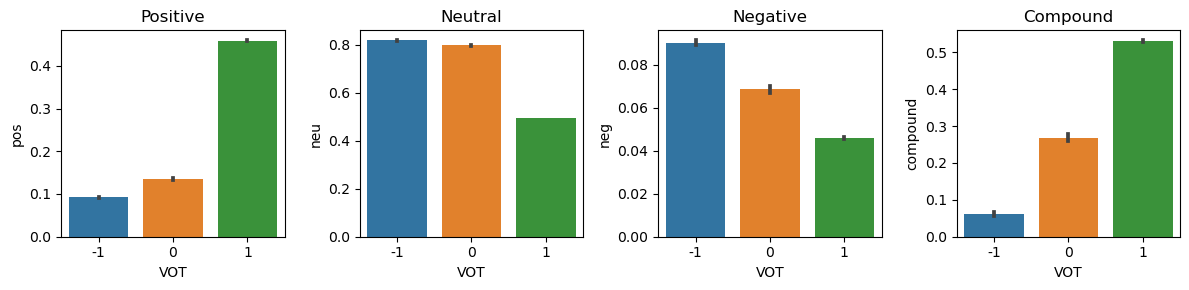

In [49]:
wiki_cle_dropna = wiki_with_scores.dropna(subset = 'CLE') # remove empty comments 
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=wiki_cle_dropna, x='VOT', y='pos', ax=axs[0])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='neu', ax=axs[1])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='neg', ax=axs[2])
sns.barplot(data=wiki_cle_dropna, x='VOT', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

On average, we can conclude that there is consistency between the votes and the associated comments.

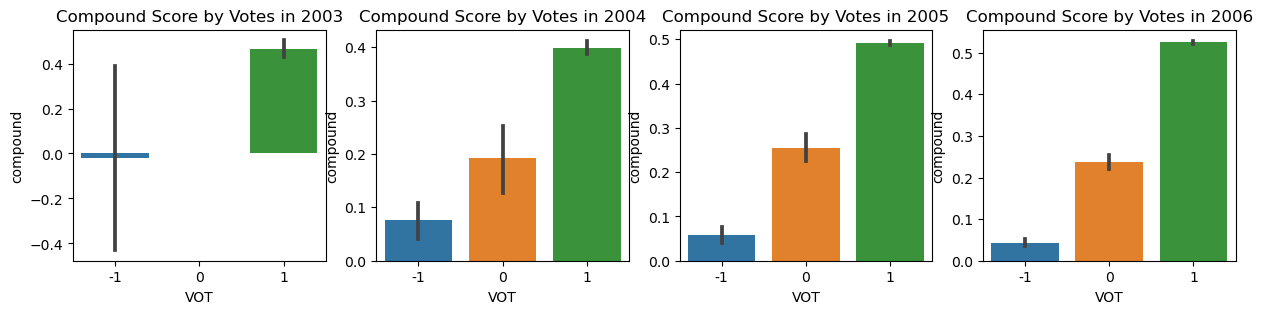

In [207]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
year = 2003 
for i in range(4):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

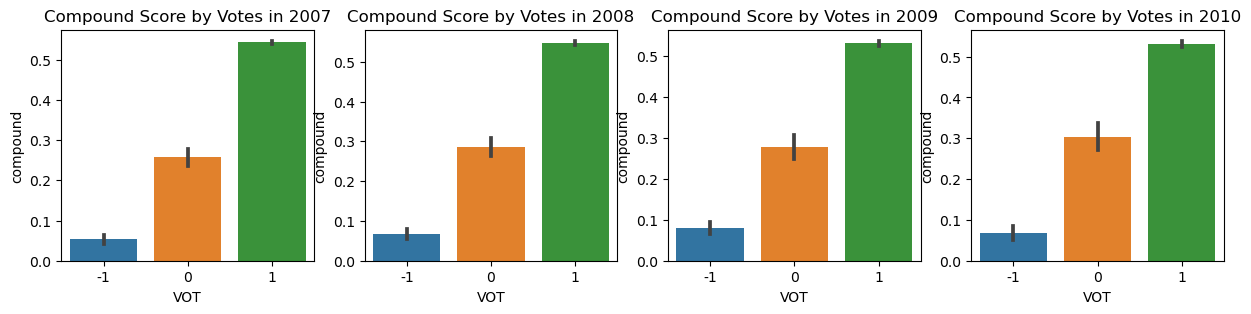

In [208]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
year = 2007 
for i in range(4):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

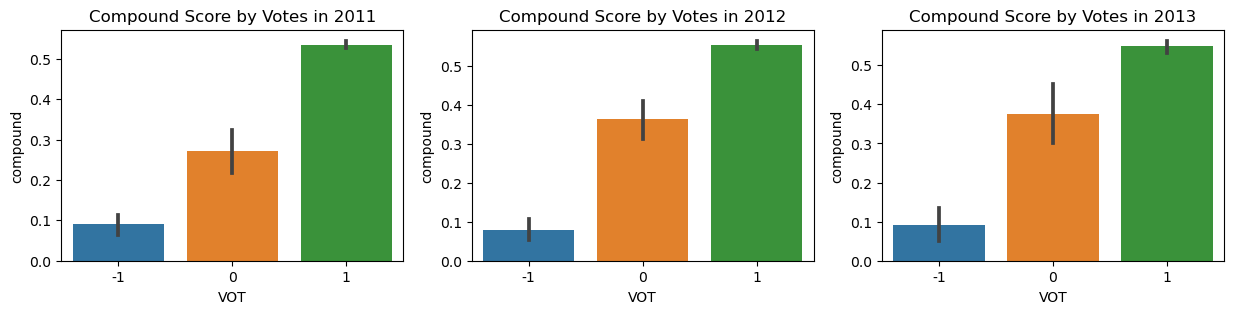

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
year = 2011 
for i in range(3):
    axs[i] = sns.barplot(data=wiki_cle_dropna[wiki_cle_dropna['YEA'] == year], x='VOT', y='compound', ax= axs[i])
    axs[i].set_title('Compound Score by Votes in ' + str(year))
    year += 1

* For each year, the conclusion of consistency is still available. Therefore, generally, people tend to leave comments accordingly to their vote choice.